In [1]:
from Scripts.Configs.ConfigClass import Config
from Scripts.DataManager.GraphConstructor.GraphConstructor import TextGraphType
import os
from Scripts.DataManager.GraphLoader.DigiKalaGraphDataModule import DigiKalaGraphDataModule
import torch
from torch.utils.flop_counter import FlopCounterMode
root_path = %pwd
config = Config(root_path)
# config = Config(r'E:\Darsi\Payan Name Arshad\Second Work\ColorIntelligence2\ColorIntelligence')
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64

c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
2024-08-14 18:06:51 WARNING: Language fa package default expects mwt, which has been added
2024-08-14 18:06:51 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| lemma     | perdt_nocharlm |

2024-08-14 18:06:51 INFO: Using device: cpu
2024-08-14 18:06:51 INFO: Loading: tokenize
2024-08-14 18:06:51 INFO: Loadin

In [2]:
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding4 import HeteroDeepGraphEmbedding4
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding5 import HeteroDeepGraphEmbedding5
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding6 import HeteroDeepGraphEmbedding6
from Scripts.Models.GraphEmbedding.HeteroDeepGraphEmbedding8 import HeteroDeepGraphEmbedding8

In [3]:
from Scripts.Models.LightningModels.LightningModels import HeteroMultiClassLightningModel
from Scripts.Models.LossFunctions.HeteroLossFunctions import MulticlassHeteroLoss1, MulticlassHeteroLoss2, MulticlassHeteroLoss3
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
import lightning as L
from lightning.pytorch.tuner import Tuner
from Scripts.Models.ModelsManager.ClassifierModelManager import ClassifierModelManager

In [4]:
import stanza

In [5]:
print(stanza.__version__)

1.8.2


In [6]:
# from stanza.pipeline.core import DownloadMethod
# token_lemma = stanza.Pipeline(
#             "fa", download_method=DownloadMethod.REUSE_RESOURCES, processors=["tokenize", "lemma"])
# token_lemma.processors

In [7]:
import pandas as pd

In [8]:
# import spacy
# nlp = spacy.load("en_core_web_sm", disable=['ner', 'lemmatizer', 'attribute_ruler', 'parser', 'tagger', 'tok2vec'])

# sample_texts = ["text1", "text2a text2b text2c", "", "text3a, text3b"]
# sample_texts2 = []
# for txt in sample_texts:
#     doc = nlp(txt)
#     tokens = [t.text for t in doc]
#     while len(tokens)<2:
#         tokens.append("#")
#     sample_texts2.append(' '.join(tokens))

In [9]:
# from IPython.display import clear_output
# import pandas as pd
# from stanza.pipeline.core import DownloadMethod
# nlp = stanza.Pipeline("fa", download_method=DownloadMethod.REUSE_RESOURCES, processors="tokenize")
# clear_output()
# df = pd.read_csv(r'data\DigiKala\test_sm.csv', header=None)
# df.columns = ['Text0', 'Score', 'Suggestion']
# df.head()
# texts2 = []
# for row in df.Text0.values:
#     doc = nlp(row)
#     tokens = [t.text for sent in doc.sentences for t in sent.tokens]
#     while len(tokens)<2:
#         tokens.append("#")
#     texts2.append(' '.join(tokens))
#     # if len(tokens) < 2:
#           df['Text'] = texts2
#     #     print(tokens)

In [10]:
graph_type= TextGraphType.FULL
data_manager = DigiKalaGraphDataModule(config, test_size=0.2, val_size=0.2, shuffle=False, start_data_load=0 , end_data_load = 3261 , device='cpu', batch_size=batch_size, graph_type=graph_type, load_preprocessed_data = True)
data_manager.load_labels()
data_manager.load_graphs()

2024-08-14 18:07:02 WARNING: Language fa package default expects mwt, which has been added
2024-08-14 18:07:02 INFO: Loading these models for language: fa (Persian):
| Processor | Package |
-----------------------
| tokenize  | perdt   |
| mwt       | perdt   |

2024-08-14 18:07:02 INFO: Using device: cpu
2024-08-14 18:07:02 INFO: Loading: tokenize
2024-08-14 18:07:02 INFO: Loading: mwt
2024-08-14 18:07:02 INFO: Done loading processors!


2024-08-14 18:07:41 WARNING: Language fa package default expects mwt, which has been added
2024-08-14 18:07:42 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |

2024-08-14 18:07:42 INFO: Using device: cpu
2024-08-14 18:07:42 INFO: Loading: tokenize
2024-08-14 18:07:42 INFO: Loading: mwt
2024-08-14 18:07:42 INFO: Loading: pos
2024-08-14 18:07:42 INFO: Loading: lemma
2024-08-14 18:07:42 INFO: Done loading processors!
2024-08-14 18:07:44 WARNING: Language fa package default expects mwt, which has been added
2024-08-14 18:07:45 INFO: Loading these models for language: fa (Persian):
| Processor | Package        |
------------------------------
| tokenize  | perdt          |
| mwt       | perdt          |
| pos       | perdt_charlm   |
| lemma     | perdt_nocharlm |

2024-08-14 18:07:45 INFO: Using devi

filename: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\full\graph_var.txt
self.start_data_load: 0
self.end_data_load: 3261
self.saving_batch_size: 1000


 Loding Graphs From File :   0%|          | 0/4 [00:00<?, ?it/s]

i: 0, min_j: 1000
data path: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\full\0_1000_compressed.pt
first step after loading data


Prepare loaded data: 100%|██████████| 1000/1000 [00:02<00:00, 467.64it/s]


before pass


 Loding Graphs From File :  25%|██▌       | 1/4 [00:33<01:40, 33.36s/it]

after loading data and pass
i: 1000, min_j: 2000
data path: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\full\1000_2000_compressed.pt
first step after loading data


Prepare loaded data: 100%|██████████| 1000/1000 [00:02<00:00, 477.15it/s]


before pass


 Loding Graphs From File :  50%|█████     | 2/4 [01:06<01:06, 33.30s/it]

after loading data and pass
i: 2000, min_j: 3000
data path: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\full\2000_3000_compressed.pt
first step after loading data


Prepare loaded data: 100%|██████████| 1000/1000 [00:02<00:00, 464.98it/s]


before pass


 Loding Graphs From File :  75%|███████▌  | 3/4 [01:39<00:33, 33.31s/it]

after loading data and pass
i: 3000, min_j: 3261
data path: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\full\3000_3261_compressed.pt
first step after loading data


Prepare loaded data: 100%|██████████| 261/261 [00:00<00:00, 339.39it/s]


before pass


 Loding Graphs From File : 100%|██████████| 4/4 [02:10<00:00, 32.74s/it]

after loading data and pass
filename: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\sentiment\graph_var.txt
self.start_data_load: 0
self.end_data_load: 3261
self.saving_batch_size: 1000



 Loding Graphs From File :   0%|          | 0/4 [00:00<?, ?it/s]

i: 0, min_j: 1000
data path: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\sentiment\0_1000_compressed.pt
first step after loading data


Prepare loaded data: 100%|██████████| 1000/1000 [00:43<00:00, 23.08it/s]


before pass


 Loding Graphs From File :  25%|██▌       | 1/4 [01:16<03:49, 76.37s/it]

after loading data and pass
i: 1000, min_j: 2000
data path: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\sentiment\1000_2000_compressed.pt
first step after loading data


Prepare loaded data: 100%|██████████| 1000/1000 [00:33<00:00, 29.43it/s]


before pass


 Loding Graphs From File :  50%|█████     | 2/4 [02:26<02:24, 72.49s/it]

after loading data and pass
i: 2000, min_j: 3000
data path: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\sentiment\2000_3000_compressed.pt
first step after loading data


Prepare loaded data: 100%|██████████| 1000/1000 [00:39<00:00, 25.49it/s]


before pass


 Loding Graphs From File :  75%|███████▌  | 3/4 [03:39<01:12, 72.72s/it]

after loading data and pass
i: 3000, min_j: 3261
data path: c:\Users\razieh\Downloads\Beyond-Words\data/GraphData/DigiKala\sentiment\3000_3261_compressed.pt
first step after loading data


Prepare loaded data: 100%|██████████| 261/261 [00:10<00:00, 25.77it/s]


before pass


 Loding Graphs From File : 100%|██████████| 4/4 [04:21<00:00, 65.35s/it]

after loading data and pass


In [11]:
from torch_geometric.data import HeteroData, Data

In [12]:
all_hetero_data = torch.load(r'data\GraphData\DigiKala\seq_gen\0_1000_compressed.pt')
# for i, hd in enumerate(all_hetero_data):
    # print(i, hd['word'].x)

In [13]:
data_manager.val_range

range(1956, 2608)

In [14]:
import spacy
import fasttext
nlp = fasttext.load_model(config.fa.pipeline)

In [15]:
from stanza.pipeline.core import DownloadMethod
nlp = stanza.Pipeline("fa", download_method=DownloadMethod.REUSE_RESOURCES, processors='tokenize')

2024-08-14 18:14:58 WARNING: Language fa package default expects mwt, which has been added
2024-08-14 18:14:58 INFO: Loading these models for language: fa (Persian):
| Processor | Package |
-----------------------
| tokenize  | perdt   |
| mwt       | perdt   |

2024-08-14 18:14:58 INFO: Using device: cpu
2024-08-14 18:14:58 INFO: Loading: tokenize
2024-08-14 18:14:58 INFO: Loading: mwt
2024-08-14 18:14:58 INFO: Done loading processors!


In [16]:
X, y = next(iter(data_manager.test_dataloader()))

In [17]:
val_dataloader = data_manager.val_dataloader()
X3, Y3 = next(iter(val_dataloader))

In [18]:
len(val_dataloader)

11

In [19]:
from copy import copy
metadata = copy(X3.metadata())

In [20]:
_ = next(iter(data_manager.test_dataloader()))
print(_[0].metadata())

(['dep', 'tag', 'word', 'sentence', 'general', 'sentiment'], [('dep', 'dep_word', 'word'), ('word', 'word_dep', 'dep'), ('tag', 'tag_word', 'word'), ('word', 'word_tag', 'tag'), ('word', 'seq', 'word'), ('general', 'general_sentence', 'sentence'), ('sentence', 'sentence_general', 'general'), ('word', 'word_sentence', 'sentence'), ('sentence', 'sentence_word', 'word'), ('word', 'word_sentiment', 'sentiment'), ('sentiment', 'sentiment_word', 'word')])


In [21]:
print('general: ', len(_[0]['general'].x))
print('sentence: ', len(_[0]['sentence'].x))
print(_[0][('general', 'general_sentence', 'sentence')].edge_index)
print(_[0][('sentence', 'sentence_general', 'general')].edge_index)
print(_[0][('word', 'word_sentiment', 'sentiment')].edge_index)

general:  64
sentence:  214
tensor([[  0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   2,   2,   2,
           3,   3,   3,   4,   5,   5,   5,   5,   6,   6,   7,   7,   8,   8,
           8,   9,  10,  10,  11,  11,  11,  11,  11,  12,  13,  13,  13,  14,
          14,  15,  15,  15,  15,  16,  17,  17,  18,  18,  18,  18,  18,  19,
          19,  19,  19,  19,  19,  19,  19,  19,  19,  20,  20,  20,  20,  20,
          21,  22,  22,  23,  23,  24,  25,  25,  25,  25,  25,  25,  25,  26,
          26,  27,  27,  27,  27,  27,  27,  27,  27,  28,  28,  28,  29,  29,
          29,  29,  29,  29,  29,  30,  30,  30,  31,  31,  31,  31,  32,  32,
          32,  33,  33,  33,  33,  33,  33,  33,  34,  34,  35,  35,  36,  36,
          37,  37,  38,  38,  38,  38,  38,  39,  39,  40,  40,  40,  41,  41,
          42,  42,  43,  43,  44,  44,  45,  46,  46,  47,  47,  48,  48,  48,
          48,  48,  48,  48,  48,  48,  48,  48,  49,  49,  49,  50,  50,  51,
          51,  51,  51, 

In [22]:

edge_type_weights = {
    'seq': [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
}

In [23]:
from os import path
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, hinge_loss
import torchmetrics

def save_evaluation(model_mgr, eval_dataloader, name_prepend: str='',
                 give_confusion_matrix: bool=True,
                 give_report: bool=True,
                 give_f1_score: bool=False,
                 give_accuracy_score: bool=False,
                 give_precision_score: bool=False,
                 give_recall_score: bool=False,
                 give_hinge_loss: bool=False,
                 multi_class: bool=False
                 ):

        test_metrics_path = path.join(model_mgr.log_dir, model_mgr.log_name, f'version_{model_mgr.logger.version}', f'{name_prepend}_test_metrics.txt')

        y_true = []
        y_pred = []
        model_mgr.lightning_model.eval()
        model_mgr.lightning_model.model.eval()
        model_mgr.torch_model.eval()
        for X, y in eval_dataloader:
            model_mgr.trainer.model.eval()
            with torch.no_grad():
                y_p = model_mgr.trainer.model(X.to(model_mgr.device))
            if type(y_p) is tuple:
                y_p = y_p[0]

            if multi_class:
                y_pred.append(y_p.detach().to(y.device))
                y_true.append(y)
            else:
                y_pred.append((y_p>0).to(torch.int32).detach().to(y.device))
                y_true.append(y.to(torch.int32))
        y_true = torch.concat(y_true)
        y_pred = torch.concat(y_pred)
        print(y_true.shape)
        print(y_pred.shape)
        if multi_class:
            y_true_num = torch.argmax(y_true, dim=1)
            y_pred_num = torch.argmax(y_pred, dim=1)
        else:
            y_true_num = y_true
            y_pred_num = y_pred

        print(y_true_num.shape)
        print(y_pred_num.shape)
        with open(test_metrics_path, 'at+') as f:
            if(give_confusion_matrix):
                print(f'confusion_matrix: \n{confusion_matrix(y_true_num, y_pred_num)}', file=f)
            if(give_report):
                print(classification_report(y_true_num, y_pred_num), file=f)
            if(give_f1_score):
                if multi_class:
                    print(f'f1_score: {f1_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {f1_score(y_true_num, y_pred_num)}', file=f)
            if(give_accuracy_score):
                print(f'accuracy_score: {accuracy_score(y_true_num, y_pred_num)}', file=f)
            if(give_precision_score):
                if multi_class:
                    print(f'f1_score: {precision_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {precision_score(y_true_num, y_pred_num)}', file=f)
            if(give_recall_score):
                if multi_class:
                    print(f'f1_score: {recall_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {recall_score(y_true_num, y_pred_num)}', file=f)
            # if(give_hinge_loss):
            #     print(f'hinge_loss: {hinge_loss(y_true_num, y_pred)}', file=f)


In [24]:
(metadata[0].remove(x, inplace=True) for x in ['dep', 'tag', 'sentence', 'sentiment'])

<generator object <genexpr> at 0x0000016991995EE0>

In [25]:
metadata

(['dep', 'tag', 'word', 'sentence', 'general', 'sentiment'],
 [('dep', 'dep_word', 'word'),
  ('word', 'word_dep', 'dep'),
  ('tag', 'tag_word', 'word'),
  ('word', 'word_tag', 'tag'),
  ('word', 'seq', 'word'),
  ('general', 'general_sentence', 'sentence'),
  ('sentence', 'sentence_general', 'general'),
  ('word', 'word_sentence', 'sentence'),
  ('sentence', 'sentence_word', 'word'),
  ('word', 'word_sentiment', 'sentiment'),
  ('sentiment', 'sentiment_word', 'word')])

In [26]:
[x for x in metadata[0] if x not in ['dep', 'tag', 'sentence', 'sentiment']]

['word', 'general']

In [27]:
[x for x in metadata[1] if x not in ['dep', 'tag', 'sentence', 'sentiment']]

[('dep', 'dep_word', 'word'),
 ('word', 'word_dep', 'dep'),
 ('tag', 'tag_word', 'word'),
 ('word', 'word_tag', 'tag'),
 ('word', 'seq', 'word'),
 ('general', 'general_sentence', 'sentence'),
 ('sentence', 'sentence_general', 'general'),
 ('word', 'word_sentence', 'sentence'),
 ('sentence', 'sentence_word', 'word'),
 ('word', 'word_sentiment', 'sentiment'),
 ('sentiment', 'sentiment_word', 'word')]

In [28]:
# for k in edge_type_weights:
#     graph_embedding = HeteroDeepGraphEmbedding8(300, 2, metadata, 32, dropout=0.2, edge_type_count=2, edge_type_weights=edge_type_weights[k], active_keys = ['word','general'])
#     graph_embedding = graph_embedding.to(device)

#     flopt_counter = FlopCounterMode(graph_embedding)
#     with flopt_counter:
#         graph_embedding(X3.to(device))

In [29]:
import torch.nn.functional as F
from torch import Tensor
import torch
from torch.nn import Linear
from torch_geometric.nn import BatchNorm, MemPooling, to_hetero, PairNorm
from torch_geometric.data import HeteroData
from Scripts.Models.BaseModels.HeteroGat import HeteroGat
from Scripts.Models.BaseModels.HeteroLinear import HeteroLinear

class HeteroDeepGraphEmbedding6(torch.nn.Module):

    def __init__(self,
                 input_feature: int, out_features: int,
                 metadata,
                 hidden_feature: int=256,
                 device = 'cpu',
                 dropout=0.1,
                 edge_type_count=9,
                 edge_type_weights=-1,
                 active_keys = ['dep', 'tag', 'word', 'sentence', 'general'],
                 num_pooling_classes=1
                 ):

        super(HeteroDeepGraphEmbedding6, self).__init__()
        self.input_features = input_feature
        self.num_out_features = out_features
        self.hidden_feature: int = hidden_feature
        self.edge_type_count = edge_type_count
        self.edge_type_weights = torch.nn.Parameter(torch.tensor([1]* self.edge_type_count if edge_type_weights==-1 else  edge_type_weights).to(torch.float32), requires_grad=False)

        self.part_weight_norm = torch.nn.LayerNorm((self.edge_type_count,))
        self.norm = PairNorm()
        self.drop = torch.nn.Dropout(0.2)
        self.active_keys = active_keys

        self.hetero_linear1 = to_hetero(HeteroLinear(self.input_features,self.hidden_feature, use_dropout=False, use_batch_norm=True), metadata)

        self.hetero_gat_1 = to_hetero(HeteroGat(self.hidden_feature, self.hidden_feature, dropout, num_heads=2), metadata)
        self.hetero_gat_2 = to_hetero(HeteroGat(self.hidden_feature, self.hidden_feature, dropout, num_heads=2), metadata)

        self.hetero_linear_2 = to_hetero(HeteroLinear(self.hidden_feature, self.input_features, dropout, use_batch_norm=True), metadata)

        self.num_pooling_classes = torch.nn.Parameter(torch.tensor(num_pooling_classes).to(torch.int32), requires_grad=False)
        self.mem_pool = MemPooling(self.hidden_feature, self.hidden_feature, 2, self.num_pooling_classes)

        self.linear_1 = Linear(self.hidden_feature* self.num_pooling_classes, self.hidden_feature)
        self.linear_2 = Linear(self.hidden_feature, self.hidden_feature)
        self.batch_norm_1 = BatchNorm(self.hidden_feature)

        self.output_layer = Linear(self.hidden_feature, self.num_out_features)

        self.dep_embedding = torch.nn.Embedding(200, self.input_features)
        self.tag_embedding = torch.nn.Embedding(200, self.input_features)
        self.dep_unembedding = torch.nn.Linear(self.hidden_feature, 200)
        self.tag_unembedding = torch.nn.Linear(self.hidden_feature, 200)

        self.pw1 = torch.nn.Parameter(torch.tensor(self.edge_type_weights, dtype=torch.float32), requires_grad=False)

        self.x_batches = None
        self.x_batches_cpu = None
        self.x_dict_cpu_1 = None
        self.x_dict_cpu_2 = None


    def forward(self, x: HeteroData) -> Tensor:
        self.x_batches = {k:x[k].batch for k in self.active_keys}
        # self.x_batches_cpu = {k:self.x_batches[k].to('cpu') for k in self.active_keys}
        x_dict, edge_attr_dict, edge_index_dict = self.preprocess_data(x)
        edge_attr_dict = self.update_weights(edge_attr_dict, self.pw1)
        x_dict = self.hetero_linear1(x_dict)
        x_dict = self.hetero_gat_1(x_dict, edge_index_dict, edge_attr_dict)
        # self.x_dict_cpu_1 = {k: x_dict[k].to('cpu') for k in x_dict}
        self.normalize(x_dict, self.x_batches)
        x_dict = self.hetero_gat_2(x_dict, edge_index_dict, edge_attr_dict)
        # self.x_dict_cpu_2 = {k: x_dict[k].to('cpu') for k in x_dict}
        x_pooled, S = self.mem_pool(x_dict['word'], self.x_batches['word'])

        x_pooled = x_pooled.view(x_pooled.shape[0], -1)
        x_pooled = F.relu(self.linear_1(x_pooled))
        x_pooled = F.relu(self.batch_norm_1(self.linear_2(x_pooled)))
        out = self.output_layer(x_pooled)

        x_dict_out = self.hetero_linear_2(x_dict)
        if 'dep' in x_dict_out:
            x_dict_out['dep'] = self.dep_unembedding(x_dict['dep'])
        if 'tag' in x_dict_out:
            x_dict_out['tag'] = self.tag_unembedding(x_dict['tag'])

        return out, x_dict_out

    def preprocess_data(self, x):
        x_dict = {key: x.x_dict[key] for key in x.x_dict}
        if 'dep' in x_dict:
            x_dict['dep'] = self.dep_embedding(x_dict['dep'])
        if 'tag' in x_dict:
            x_dict['tag'] = self.tag_embedding(x_dict['tag'])

        edge_attr_dict = x.edge_attr_dict
        edge_index_dict = x.edge_index_dict

        return x_dict, edge_attr_dict, edge_index_dict

    def normalize(self, x_dict, x_batches):
        for k in self.active_keys:
            vecs = x_dict[k]
            if k not in x_batches:
                print('k is not in x_batches')
                continue
            batches = x_batches[k]
            if batches is None:
                print('batches is none')
                continue
            if len(batches) == 0:
                print('batches is empty')
                continue

            x_dict[k] = self.norm(vecs, batches)
        return x_dict

    def update_weights(self, edge_attr_dict, part_weights):
        for i, key in enumerate(edge_attr_dict):
            edge_attr = edge_attr_dict[key]
            if edge_attr is None or edge_attr == ('word', 'seq', 'word'):
                continue
            edge_attr_dict[key]= edge_attr * part_weights[i]
        return edge_attr_dict

    def get_scale_same(self, scale:float, attributes: Tensor):
        if attributes is None or len(attributes) == 0:
            return
        attributes = scale * torch.ones_like(attributes)
        return attributes

In [30]:
from typing import List
import torch
from torch import nn

from Scripts.Models.LossFunctions.HeteroLossArgs import HeteroLossArgs


class MulticlassHeteroLoss2(torch.nn.Module):
    def __init__(self, exception_keys: List[str], enc_factor=0.0, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.cel_loss=  torch.nn.CrossEntropyLoss()
        self.mse_loss = torch.nn.MSELoss()
        self.exception_keys = exception_keys
        self.enc_factor = enc_factor

    def forward(self, out_pred: HeteroLossArgs, out_main: HeteroLossArgs):
        loss = self.cel_loss(out_pred.y, out_main.y)
        x_dict_keys = [k for k in out_pred.x_dict.keys() if k not in self.exception_keys]

        for key in x_dict_keys:
            tensor1 = out_pred.x_dict[key]
            tensor2 = out_main.x_dict[key]
            if tensor2.ndim == 1 and tensor2.dtype is torch.long:
                tensor2 = torch.nn.functional.one_hot(input=tensor2.to(torch.long), num_classes=tensor1.shape[1]).to(torch.float32)
            loss += self.enc_factor * (self.mse_loss(tensor1, tensor2))
        return loss

In [31]:
metadata

(['dep', 'tag', 'word', 'sentence', 'general', 'sentiment'],
 [('dep', 'dep_word', 'word'),
  ('word', 'word_dep', 'dep'),
  ('tag', 'tag_word', 'word'),
  ('word', 'word_tag', 'tag'),
  ('word', 'seq', 'word'),
  ('general', 'general_sentence', 'sentence'),
  ('sentence', 'sentence_general', 'general'),
  ('word', 'word_sentence', 'sentence'),
  ('sentence', 'sentence_word', 'word'),
  ('word', 'word_sentiment', 'sentiment'),
  ('sentiment', 'sentiment_word', 'word')])

In [32]:
# Fardin Rastakhiz @ 2023


from torch import nn, Tensor
import torch.nn.functional as F
from torch_geometric.nn import BatchNorm


class HeteroLinear(nn.Module):

    def __init__(self, in_feature, out_feature, dropout = 0.2, use_dropout=True, use_batch_norm=False, use_activation=True) -> None:
        super().__init__()
        self.linear = nn.Linear(in_feature, out_feature)
        self.batch_norm = BatchNorm(out_feature)
        self.dropout= nn.Dropout(dropout)
        self.use_batch_norm = use_batch_norm
        self.use_dropout = use_dropout
        self.use_activation=use_activation

    def forward(self, x: Tensor) -> Tensor:

        x = self.linear(x)
        if self.use_batch_norm:
            x = self.batch_norm(x)
        if self.use_activation:
            x = F.leaky_relu(x)
        if self.use_dropout:
            x = self.dropout(x)
        return x

In [33]:
import torch
print(torch.cuda.device_count())

0


In [34]:
for i in range(1):
    for k in edge_type_weights:
        graph_embedding = HeteroDeepGraphEmbedding6(300, 3, metadata, 16, dropout=0.4, edge_type_count=2, edge_type_weights=edge_type_weights[k], active_keys=['word', 'general'])
        graph_embedding = graph_embedding.to(device)
        callbacks = [
        ModelCheckpoint(save_top_k=5, mode='max', monitor='val_acc', save_last=True)
        ]
        loss_func = MulticlassHeteroLoss2(exception_keys=['word'], enc_factor=0.003)
        optimizer = torch.optim.Adam(graph_embedding.parameters(), lr=0.045, weight_decay=0.0125)
        lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6, 13, 28, 45, 60], gamma=0.5, verbose=True)
        lightning_model = HeteroMultiClassLightningModel(graph_embedding, 4,
                                            optimizer=optimizer,
                                            loss_func=loss_func,
                                            learning_rate=0.045,
                                            batch_size=batch_size,
                                            user_lr_scheduler=True,
                                            lr_scheduler=lr_scheduler,
                                            min_lr=0.005
                                            ).to(device)
        lightning_model.model.to(device)

        model_manager = ClassifierModelManager(graph_embedding, lightning_model, log_name='hetero_model_20_AG',device=device, num_train_epoch=40)
        model_manager.fit(datamodule=data_manager)
        # model_manager.save_plot_csv_logger(loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc'], name_prepend=f'tests_{i}_{k}')
        model_manager.torch_model = model_manager.torch_model.to(device)
        save_evaluation(model_manager, data_manager.val_dataloader(), f'{i}_{k}',True, True, True, True, True, True, True, multi_class=True)

C:\Users\razieh\AppData\Local\Temp\ipykernel_5012\1102389976.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pw1 = torch.nn.Parameter(torch.tensor(self.edge_type_weights, dtype=torch.float32), requires_grad=False)
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type                      | Params
--------------------------------------------------------
0 | model     | HeteroDeepGraphEmbedding6 | 204 K 
1 | loss_func | MulticlassHeteroLoss2     | 0     
2 | train_acc | MulticlassAccuracy        | 0     
3 | val_acc   | MulticlassAccuracy        | 0     
4 | test_acc  | MulticlassAccuracy        | 0     
--------------------------------------------------------
204 K     Trainable params
23        Non-trainable params
204 K     Total params
0.818     Total estimated model params size (MB)
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `Da

Epoch 39: 100%|██████████| 30/30 [00:31<00:00,  0.95it/s, v_num=45, train_loss_step=0.763, train_acc_step=0.734, val_acc=0.753, train_loss_epoch=0.778, train_acc_epoch=0.726]

`Trainer.fit` stopped: `max_epochs=40` reached.


Epoch 39: 100%|██████████| 30/30 [00:31<00:00,  0.95it/s, v_num=45, train_loss_step=0.763, train_acc_step=0.734, val_acc=0.753, train_loss_epoch=0.778, train_acc_epoch=0.726]
torch.Size([652, 3])
torch.Size([652, 3])
torch.Size([652])
torch.Size([652])


c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [35]:
from os import path
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, hinge_loss
import torchmetrics

def save_evaluation(model_mgr, l_model, eval_dataloader, name_prepend: str='',
                 give_confusion_matrix: bool=True,
                 give_report: bool=True,
                 give_f1_score: bool=False,
                 give_accuracy_score: bool=False,
                 give_precision_score: bool=False,
                 give_recall_score: bool=False,
                 give_hinge_loss: bool=False,
                 multi_class: bool=False
                 ):

        test_metrics_path = path.join(model_mgr.log_dir, model_mgr.log_name, f'version_{model_mgr.logger.version}', f'{name_prepend}_test_metrics.txt')

        y_true = []
        y_pred = []
        for X, y in eval_dataloader:
            l_model.eval()
            with torch.no_grad():
                y_p = l_model(X.to(model_mgr.device))
            if type(y_p) is tuple:
                y_p = y_p[0]

            if multi_class:
                y_pred.append(y_p.detach().to(y.device))
                y_true.append(y)
            else:
                y_pred.append((y_p>0).to(torch.int32).detach().to(y.device))
                y_true.append(y.to(torch.int32))
        y_true = torch.concat(y_true)
        y_pred = torch.concat(y_pred)
        print(y_true.shape)
        print(y_pred.shape)
        if multi_class:
            y_true_num = torch.argmax(y_true, dim=1)
            y_pred_num = torch.argmax(y_pred, dim=1)
        else:
            y_true_num = y_true
            y_pred_num = y_pred

        print(y_true_num.shape)
        print(y_pred_num.shape)
        with open(test_metrics_path, 'at+') as f:
            if(give_confusion_matrix):
                print(f'confusion_matrix: \n{confusion_matrix(y_true_num, y_pred_num)}', file=f)
            if(give_report):
                print(classification_report(y_true_num, y_pred_num), file=f)
            if(give_f1_score):
                if multi_class:
                    print(f'f1_score: {f1_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {f1_score(y_true_num, y_pred_num)}', file=f)
            if(give_accuracy_score):
                print(f'accuracy_score: {accuracy_score(y_true_num, y_pred_num)}', file=f)
            if(give_precision_score):
                if multi_class:
                    print(f'f1_score: {precision_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {precision_score(y_true_num, y_pred_num)}', file=f)
            if(give_recall_score):
                if multi_class:
                    print(f'f1_score: {recall_score(y_true_num, y_pred_num, average=None)}', file=f)
                else:
                    print(f'f1_score: {recall_score(y_true_num, y_pred_num)}', file=f)
            # if(give_hinge_loss):
            #     print(f'hinge_loss: {hinge_loss(y_true_num, y_pred)}', file=f)

In [36]:
save_evaluation(model_manager, lightning_model, data_manager.test_dataloader(), 'chpt_n',True, True, True, True, True, True, True, multi_class=True)

torch.Size([653, 3])
torch.Size([653, 3])
torch.Size([653])
torch.Size([653])


c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\razieh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [37]:
docs = [nlp(tx) for tx in data_manager.df['Text']]
doc_tokens = [[t.text for sent in doc.sentences for t in sent.tokens] for doc in docs]
lengths = [len(ts) for ts in doc_tokens]

In [38]:
# graph_leghts = [data[0]['word'].x.shape[0] for data in data_manager.dataset[graph_type]]

In [39]:
# list1 = (data_manager.df.Suggestion.values-1).tolist()
# list2 = torch.argmax(data_manager.labels, dim=1).tolist()
# [(list1[i], list2[i]) for i in range(len(list1))]

In [40]:
# len(list2)

In [41]:
# dict(zip(lengths, graph_leghts))

In [42]:
import matplotlib.pyplot as plt
def draw_plot(data_array: List, labels: List, fig_name):
    for (d_array, d_label) in zip(data_array, labels):
        plt.plot(d_array, label=d_label)
    plt.legend()
    plt.title(fig_name)
    plt.show()
    plt.close()

In [44]:
# draw_plot([train_losses[-300:], test_losses[-300:]], ['train_losses', 'test_losses'], 'cite_seer_losses')
# draw_plot([train_accuracies[-300:], test_accuracies[-300:]], ['train_accuracies', 'test_accuracies'], 'cite_seer_accuracies')

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

'''From torch lightning tutorials'''
def plot_csv_logger(csv_path, loss_names=['train_loss_epoch', 'val_loss'], eval_names=['train_acc_epoch', 'val_acc']):
    metrics = pd.read_csv(csv_path)
    
    aggregation_metrics = []
    agg_col = 'epoch'
    for i, dfg in metrics.groupby(agg_col):
        agg = dict(dfg.mean())
        agg[agg_col] = i
        aggregation_metrics.append(agg)
    
    df_metrics = pd.DataFrame(aggregation_metrics)
    df_metrics[loss_names].plot(grid=True, legend=True, xlabel='Epoch', ylabel='loss')
    df_metrics[eval_names].plot(grid=True, legend=True, xlabel='Epoch', ylabel='accuracy')
    plt.show()

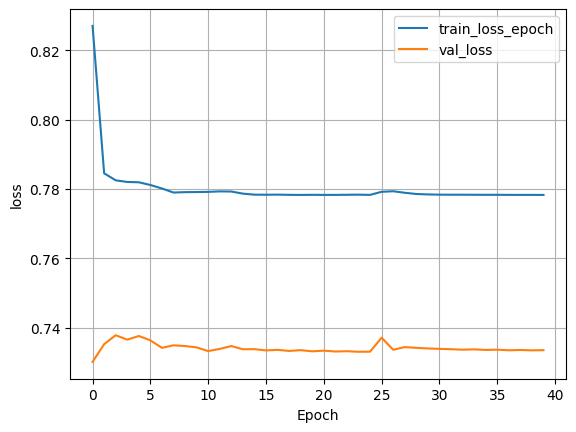

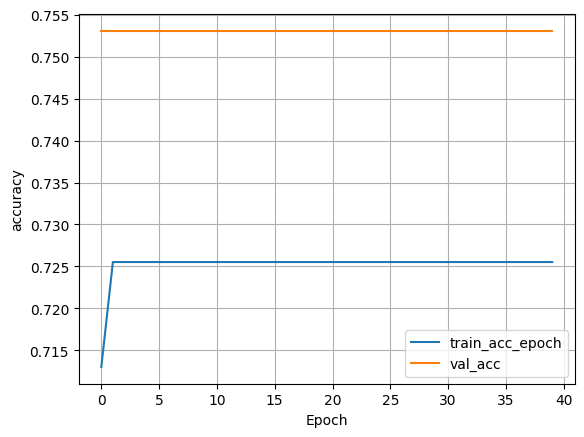

In [48]:
plot_csv_logger(r'C:\Users\razieh\Downloads\Beyond-Words\logs\hetero_model_20_AG\version_45\metrics.csv')